# Imports

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


2022-06-06 18:02:00.055312: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-06 18:02:00.055366: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import cv2
import os

In [3]:
img = image.load_img("faces/train/anger/google_003.jpg")

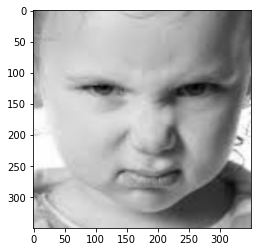

In [4]:
plt.imshow(img)

In [5]:
 cv2.imread("faces/train/anger/google_003.jpg").shape

(350, 350, 3)

In [6]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
validate = ImageDataGenerator(rescale=1/255)

print train

In [14]:
train_ds = train.flow_from_directory('faces/train/', 
                                     target_size=(350,350), 
                                     batch_size=3, 
                                     class_mode='categorical')

validate_ds = validate.flow_from_directory('faces/validate/', 
                                     target_size=(350,350), 
                                     batch_size=3, 
                                     class_mode='categorical')

Found 352 images belonging to 9 classes.
Found 352 images belonging to 9 classes.


In [15]:
train_ds.class_indices

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'joy': 4,
 'kiss': 5,
 'neutral': 6,
 'sadness': 7,
 'surprise': 8}

Me tira unos 'warnings', al parecer es que keras nos esta diciendo que va a usar mas memoria de la que el sistema le puede dar.

In [16]:
model = tf.keras.models.Sequential(
    [ 
        tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (350,350,3)),
        tf.keras.layers.MaxPool2D(2,2),
        #
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPool2D(2,2),
        #
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPool2D(2,2),
        ##
        tf.keras.layers.Flatten(),
        ##
        tf.keras.layers.Dense(512, activation='relu'),
        ##
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

Lo de abajo va a compilar el modelo:
    - loss: ...
    - optimizador: ...
    - metricas: son las metricas que queremos optimizar, en este caso es accuracy

In [17]:
model.compile(
    loss='binary_crossentropy',
    optimizer = RMSprop(learning_rate=0.001),
    metrics = ['accuracy']
)

Ahora se pone el dataset en el modelo:
    - dataset:
    - steps_per_epoch: son los pasos que va a hacer cada epoch
    - epochs: son las iteraciones que va a usar el optimizador
    - validation_data: ...

In [18]:
model_fit = model.fit(
    train_ds,
    steps_per_epoch = 3,
    epochs = 10,
    validation_data = validate_ds
)

Epoch 1/10
3/3 [==============================] - 9s 4s/step - loss: 2.3557 - accuracy: 0.8889 - val_loss: 3.9511 - val_accuracy: 0.1111
Epoch 2/10
3/3 [==============================] - 8s 4s/step - loss: 1.7395 - accuracy: 0.6296 - val_loss: 0.3891 - val_accuracy: 0.8889
Epoch 3/10
3/3 [==============================] - 7s 3s/step - loss: 0.4140 - accuracy: 0.8889 - val_loss: 0.3531 - val_accuracy: 0.8889
Epoch 4/10
3/3 [==============================] - 7s 3s/step - loss: 0.3540 - accuracy: 0.8889 - val_loss: 0.3834 - val_accuracy: 0.8889
Epoch 5/10
3/3 [==============================] - 7s 3s/step - loss: 0.3711 - accuracy: 0.8889 - val_loss: 0.3806 - val_accuracy: 0.8889
Epoch 6/10
3/3 [==============================] - 7s 3s/step - loss: 0.3712 - accuracy: 0.8889 - val_loss: 0.3631 - val_accuracy: 0.8889
Epoch 7/10
3/3 [==============================] - 7s 3s/step - loss: 0.3600 - accuracy: 0.8889 - val_loss: 0.3521 - val_accuracy: 0.8889
Epoch 8/10
3/3 [=========================

Luego de la optimizacion estoy listo para probarlo con mis imagenes en train

In [19]:
validate_ds.class_indices

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'joy': 4,
 'kiss': 5,
 'neutral': 6,
 'sadness': 7,
 'surprise': 8}

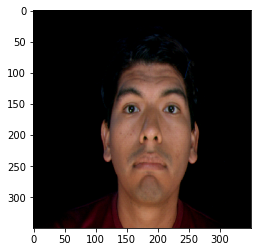

enojado


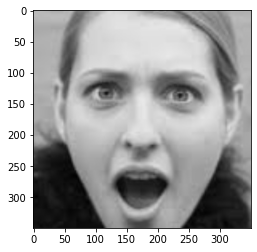

enojado


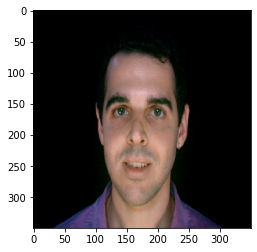

enojado


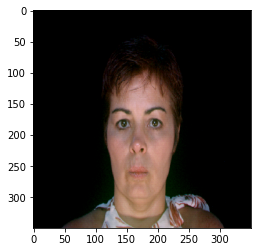

enojado


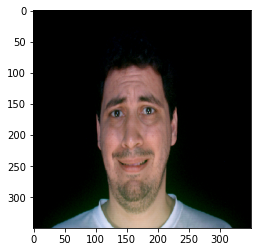

enojado


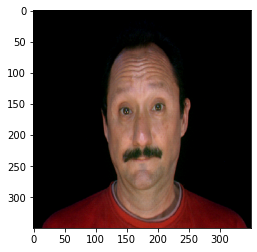

enojado


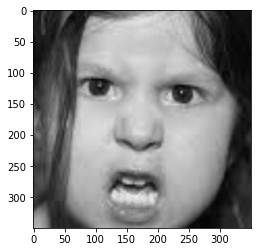

enojado


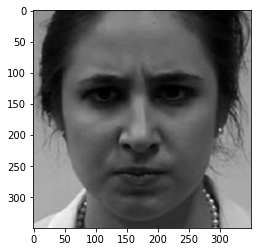

enojado


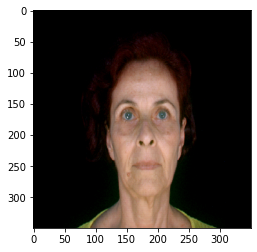

enojado


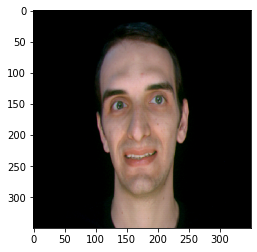

enojado


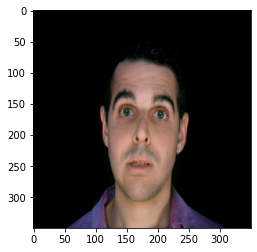

enojado


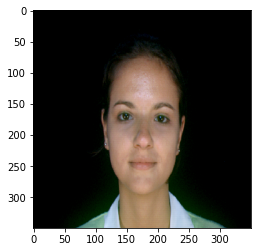

enojado


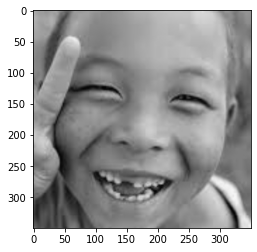

enojado


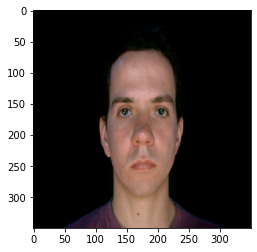

enojado


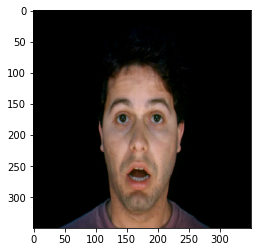

enojado


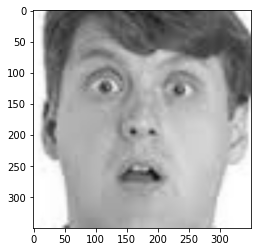

enojado


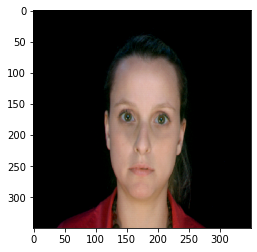

enojado


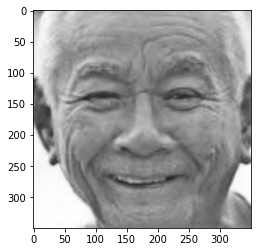

enojado


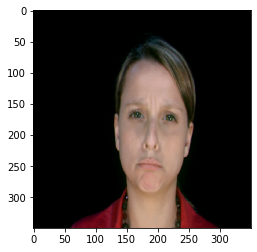

enojado


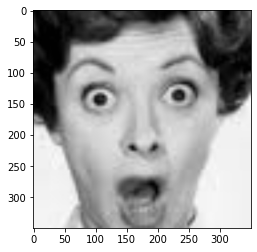

enojado


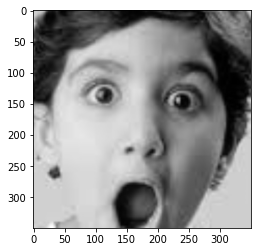

enojado


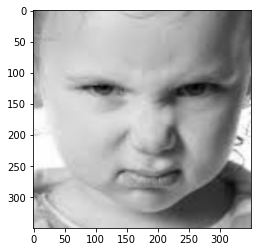

enojado


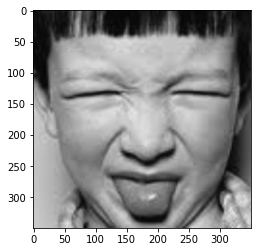

enojado


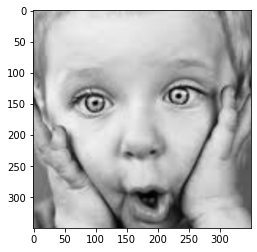

enojado


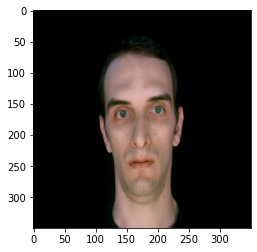

enojado


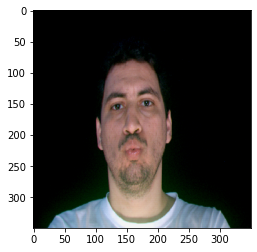

enojado


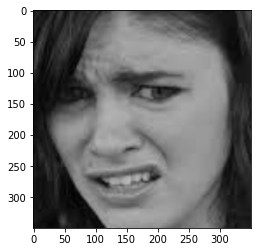

enojado


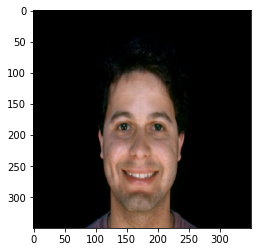

enojado


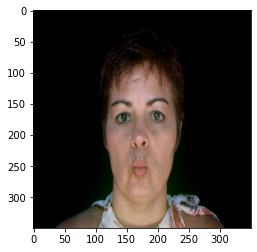

enojado


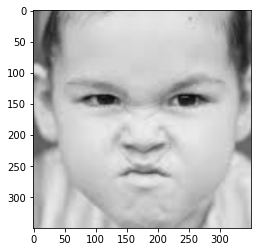

enojado


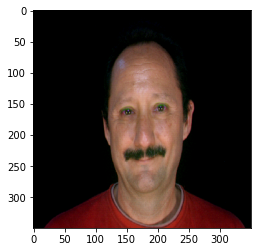

enojado


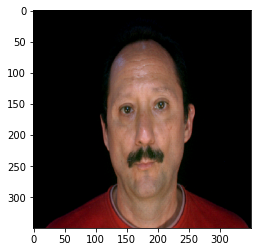

enojado


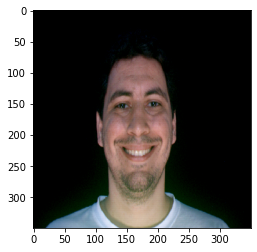

enojado


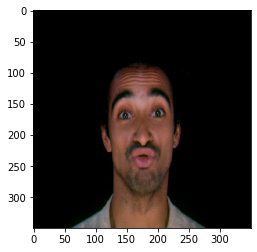

enojado


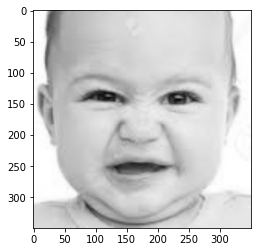

enojado


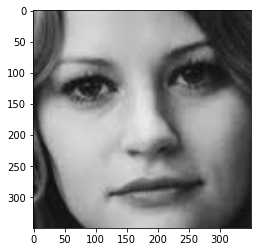

enojado


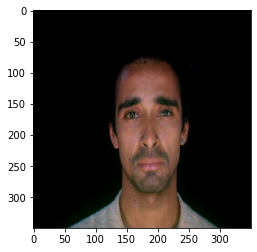

enojado


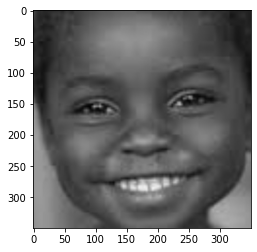

enojado


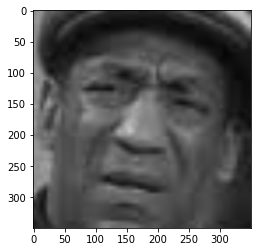

enojado


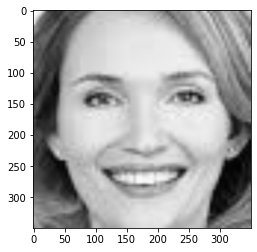

enojado


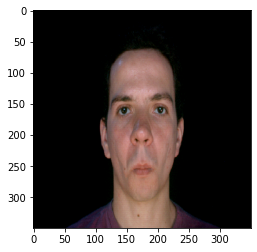

enojado


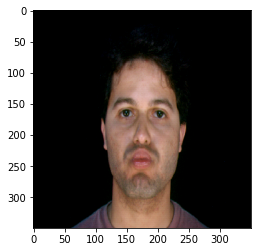

enojado


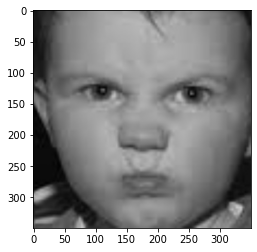

enojado


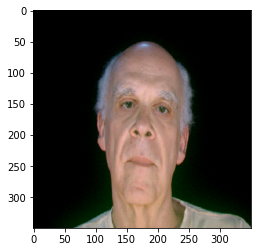

enojado


In [20]:
path = 'faces/test/test'

for i in os.listdir(path):
    img = image.load_img(path + '//' + i, target_size=(350,350))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    imagenes = np.vstack([x])
    val =  model.predict(imagenes)
    
      
    if val == 0:
        print ('enojado')
    elif val == 1:
        print ('disgustado')
    elif val == 2:
        print ('asustado')
    elif val == 3:
        print ('feliz')
    elif val == 4:
        print ('alegre')
    elif val == 5:
        print ('tirando un beso')
    elif val == 6:
        print ('neutral')
    elif val == 7:
        print ('triste')
    elif val == 8:
        print ('sorpresa!')
